# Visualize multidimensional and geospatial variables

Reference notebook for the second task of the Climate Geospatial Analysis with Python and Xarray project on Coursera.

Instructor: Danilo Lessa Bernardineli (https://danlessa.github.io/)

---

- Welcome back! On this task, we are going to learn how to use Xarray integrations with Matplotlib so that we can see visualizations for our geospatial data. By the end of it, our project will take an much more visual aspect!
- As will you see, this is as simple as just passing an method over an variable, so let's get started and open the task 3 notebook. Run all blocks so that we have the data set up.

In [1]:
import xarray as xr

In [2]:
ds = xr.open_dataset('data.nc').sel(expver=1)

In [3]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 89, longitude: 142, time: 500)
Coordinates:
  * longitude  (longitude) float32 -82.0 -81.75 -81.5 ... -47.25 -47.0 -46.75
  * latitude   (latitude) float32 6.0 5.75 5.5 5.25 ... -15.5 -15.75 -16.0
    expver     int32 1
  * time       (time) datetime64[ns] 1979-01-01 1979-02-01 ... 2020-08-01
Data variables:
    lai_hv     (time, latitude, longitude) float32 ...
    skt        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-09-30 12:13:58 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

- Now, I'll introduce you to Xarray plot method, which is smart wrapper around matplotlib functions. To see it working, open a new block and type with me: ds skt plot. Run it.

Matplotlib is building the font cache; this may take a moment.


(array([1.180000e+02, 3.424000e+03, 3.899800e+04, 1.086510e+05,
        1.537960e+05, 3.378610e+05, 1.026602e+06, 4.416252e+06,
        2.071530e+05, 8.690000e+02]),
 array([266.844  , 271.1717 , 275.49936, 279.82706, 284.15472, 288.48242,
        292.81012, 297.1378 , 301.46548, 305.79315, 310.12085],
       dtype=float32),
 <BarContainer object of 10 artists>)

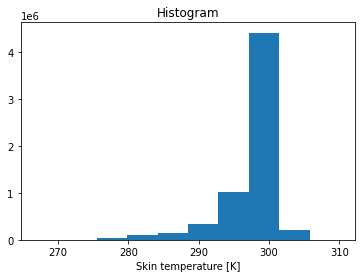

In [4]:
ds.skt.plot()

- As you can see, we have now an histogram for all the skin temperatures over our dataset. Xarray automatically put the label, and as we will see, Xarray also selections the visualization according to the dimensionality of the dataset that we are plotting. When the data have more than two dimensions, the default is to plot just an histogram, as was is this case.
- Now let's go to another example. Suppose that we want visualize only the temperatures on the first time data point for our dataset, so open a new block and type with me: ds isel time equals zero skt plot. Run it.

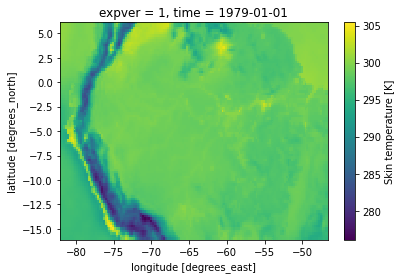

In [5]:
ds.isel(time=0).skt.plot()

- Pretty isn't? Xarray detected that now we have two coordinates for the skin temperature, and it has plotted an matrix visualization for us. By the way, this is the map for the temperatures over the Amazon.
- Another variable visualization that we can do is to see a vegetation index for the Amazon. To do that, open a new block and type ds isel time zero lai hv plot. Run it.

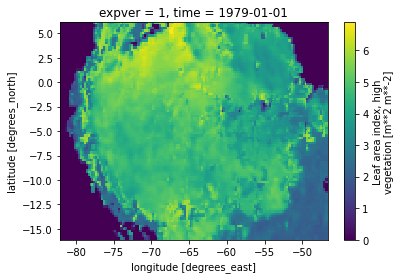

In [6]:
ds.isel(time=0).lai_hv.plot()

- This is an map for the vegetation density. Bright colors are where we still have conserved forests, while the dark spots are places where we don't have forests, like oceans, savannahs and pastures.
- Another variation of the visualizations is to have an one-dimensional plot. To do that, we must select an latitude and a longitude for instance, so that we have an time-serie for that plot. To see what I mean, open a new block, and type ds isel longitude zero latitude zero skt plot. Run it.

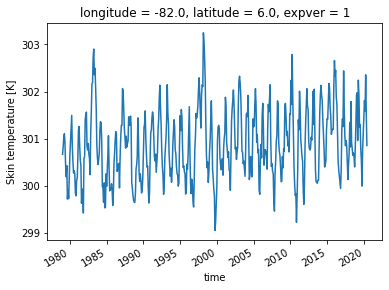

In [7]:
ds.isel(longitude=0, latitude=0).skt.plot()

- This is the temperature time series since 1980 for an point over the Amazon. Can you see any trend? Feel free to pause the video to experiment with more points.
- Let's do another variation: let's select the first point in time together with a longitude point that doesn't give biased by the oceans and mountains on South America, like longitude minus 59. Open a new block, and type with me: ds isel time equals zero sel longitude equals -59 method nearest skt plot. Run it.

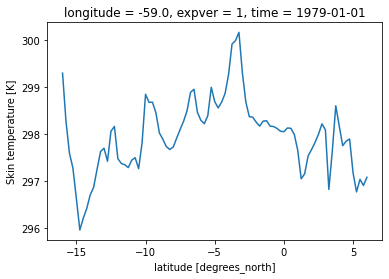

In [8]:
ds.isel(time=0).sel(longitude=-59, method='nearest').skt.plot()

- This is a fun plot actually. It shows how temperature changes according to the latitude. You can see that there is an high point near latitude minus 5, and that it has an very diffuse trend before going up again. 
- The beautiful thing about dense geospatial datasets is that you have an infinity of analysis that you could do even with simple methods. As we get more tools on the next tasks, we'll increase a lot of the scope of the knowledge that we can generate.
- So that is it for this task! You now know how to visualize geospatial data, and on next task we'll learn how to perform simple multidimesional operations on our dataset. See ya!

## Quiz

- When you call the .plot() method into a Xarray variable, what are the result given the quantity of dimensions for that variable?
    - [ ] Three dimensions -> 3D visualization
    - [x] Three dimensions -> Histogram
    - [x] Two dimensions -> Grid visualization
    - [x] One dimension -> Line plot